# Introdução ao experimento num Data Frame



#importando as bibliotecas

In [1]:
# Pandas
import pandas as pd

# Numpy
import numpy as np


In [2]:
# Construindo uma matriz representando todos os ensaios realizados.

ensaios = np.array([[-1,-1],[1,-1],[-1,1],[1,1]])
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

In [4]:
# instalando a biblioteca pyDOE2
# !pip install pyDOE2

import pyDOE2 as doe

  Preparing metadata (setup.py) ... done
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25523 sha256=d3713292ea4d73f7682022371cbc23458bc95d635a441752ee856064b2b5cbb7
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built pyDOE2


In [5]:
# Construindo um planejamento fatorial de 2^2 automaticamente pela biblioteca pyDOE2
ensaios = doe.ff2n(2)
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [6]:
# Inserindo o planejamento em um Data Frame

experimento = pd.DataFrame(ensaios,columns=['Farinha','Chocolate'])
experimento

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


In [7]:
# Inserindo coluna com os resultados

experimento['Porcoes'] = [19,37,24,49]
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


# Analisando graficamente o experimento

In [8]:
# Analisando graficamente o experimento
import seaborn as sns
# paletas
sns.set_palette('terrain')
# estilo
sns.set_style('darkgrid')

## Para farinha

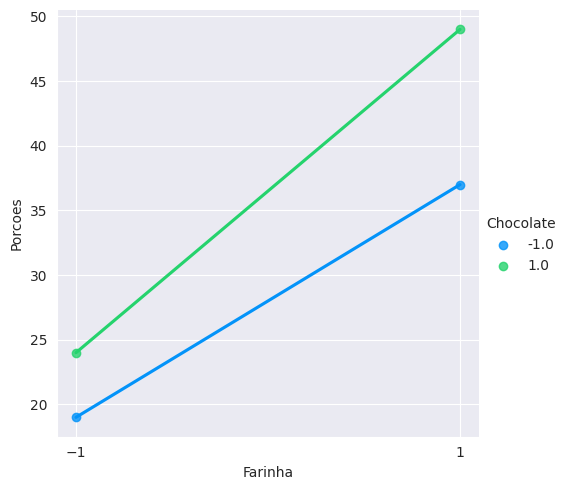

In [9]:
ax1 = sns.lmplot(data = experimento, x= 'Farinha', y='Porcoes', ci = None, hue = 'Chocolate')

ax1.set(xticks = (-1,1))

## Para o Chocolate

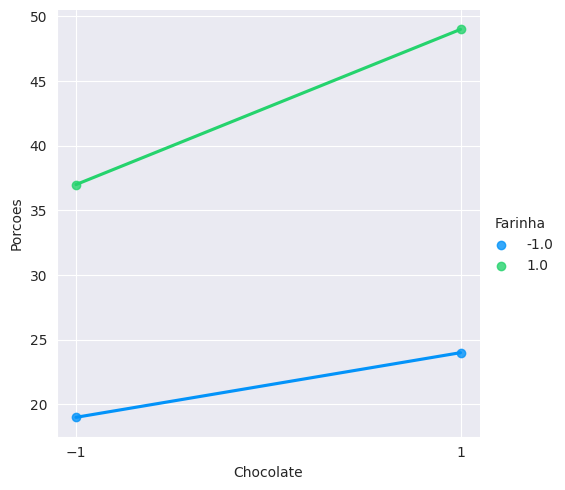

In [10]:
ax2 = sns.lmplot(data = experimento, x= 'Chocolate', y='Porcoes', ci = None, hue = 'Farinha')

ax2.set(xticks = (-1,1))

## Conclusão do experimento:


## 1 hipótese: o efeito de interação entre a Farinha e Chocolate são diretamente proporcional a quantidade produzida de Cupcakes na receita.

## 2 hipótese: Porém a farinha tem maior influência na quantidade de Cupcakes produzidos

# Comprovando as Hipóteses

## Ajustando o modelo estatístico
## Qual é efeito é mais importante na definição da quantidade de Cupcakes produzidos.
## Testando as hipóteses se existe ou não uma interação entre a Farinha e o Chocolate#

In [11]:
# biblioteca Stats Model
import statsmodels.api as sm

import statsmodels.formula.api as smf

## Interação da Farinha e Chocolate isoladamente + interação da farinha e chocolate juntos

In [12]:
modelo = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate +  Farinha:Chocolate ')

In [13]:
modelo_ajustado = modelo.fit()

In [14]:
print (modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 09 Aug 2024   Prob (F-statistic):                nan
Time:                        20:24:59   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw =

# Calculando Modelo Estatístico - Graus de Liberdade dos Resíduos

n= numero de ensaios

p= numero de parâmetros no modelo

GLR = n - p

## Para fazer a análise estatística de significância dos parâmetros assim como avaliar os ajustes, o GLR deve ser maior de zero.  

## Aumentando os Graus de Liberdade
aumentando o numero de experimentos

In [15]:
centro = np.array([[0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30],])

In [16]:
centro_dataframe = pd.DataFrame(centro, columns = ['Farinha', 'Chocolate', 'Porcoes'], index= [4,5,6,7])

In [17]:
centro_dataframe

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [18]:
experimento = pd.concat([experimento, centro_dataframe], ignore_index=True)
experimento

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# Teste de Significância estatística

In [19]:
modelo = smf.ols(data = experimento, formula ='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [20]:
modelo_ajustado = modelo.fit()

In [21]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Fri, 09 Aug 2024   Prob (F-statistic):            0.00152
Time:                        20:25:50   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


In [22]:
# pegando os valores t e o nome de suas variáveis
t_valores = modelo_ajustado.tvalues
t_valores

,0
Intercept,43.494275
Farinha,10.708252
Chocolate,4.233495
Farinha:Chocolate,1.743204


In [23]:
nome = t_valores.index.tolist()
nome

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

## importando a biblioteca scipy para fazer o gráfico de pareto

In [24]:
from scipy import stats

In [25]:
distribuicao = stats.t(df = 4)

In [26]:
distribuicao.ppf(q = 1 - 0.025)

2.7764451051977987

In [27]:
limite = [distribuicao.ppf(q = 1 - 0.025)] * len(nome)

In [28]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

# Plotando o gráfico

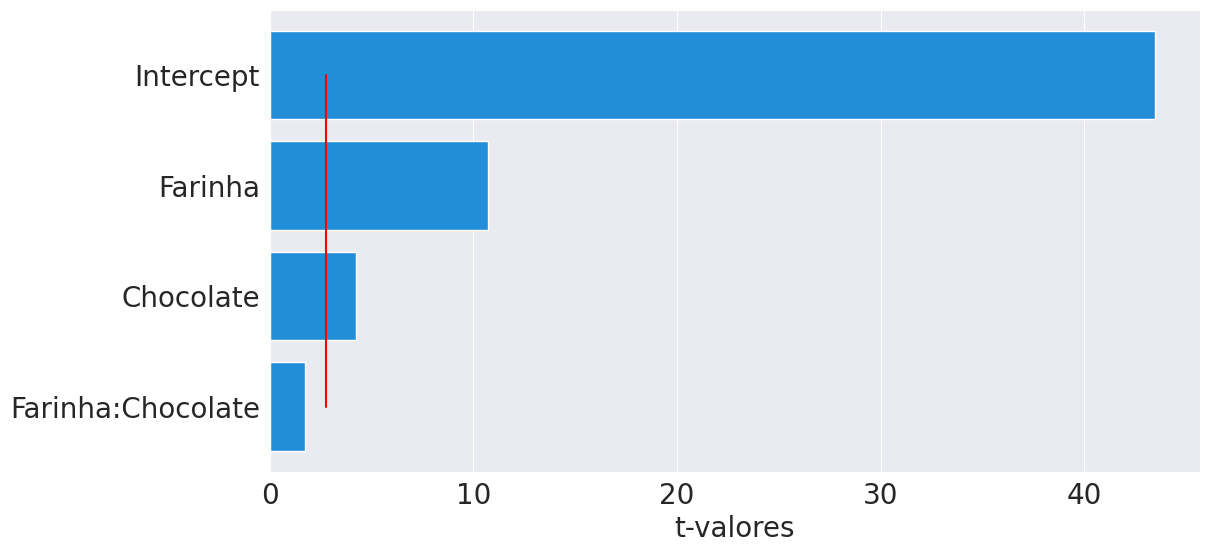

In [29]:
pareto = sns.barplot(x= t_valores, y=nome)

pareto.figure.set_size_inches(12,6)

pareto.tick_params(labelsize = 20)

pareto.set_xlabel('t-valores', fontsize = 20)

pareto.plot(limite,nome,'r')

## Conclusão:

## Através da análise do Gráfico de Pareto, podemos concluir que as variáveis Farinha e Chocolate são estatisticamente significativos, portanto, eles influenciam na quantidade de cupcakes isoladamentes.

## Porém a interação da Farinha:Chocolate não é estatisticamente significativo, ou seja, ele não influencia a quantidade de cupcakes.

# Modelo estatístico atualizado

In [30]:
modelo_2 = smf.ols(data = experimento, formula = 'Porcoes ~ Farinha + Chocolate')

In [31]:
modelo_ajustado_2 = modelo_2.fit()

In [32]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           0.000571
Time:                        20:26:53   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


# Gráfico Padronizado de Pareto do novo modelo

In [33]:
t_valores = modelo_ajustado_2.tvalues
t_valores

,0
Intercept,36.658022
Farinha,9.025173
Chocolate,3.568092


In [34]:
nome = t_valores.index.tolist()

In [35]:
nome

['Intercept', 'Farinha', 'Chocolate']

In [36]:
distribuicao = stats.t(df = 5)


In [37]:
distribuicao.ppf(q = 1 - 0.025)

2.570581835636314

In [38]:
limite = [distribuicao.ppf(q = 1- 0.025)] * len(nome)
limite

[2.570581835636314, 2.570581835636314, 2.570581835636314]

# Plotando o Gráfico

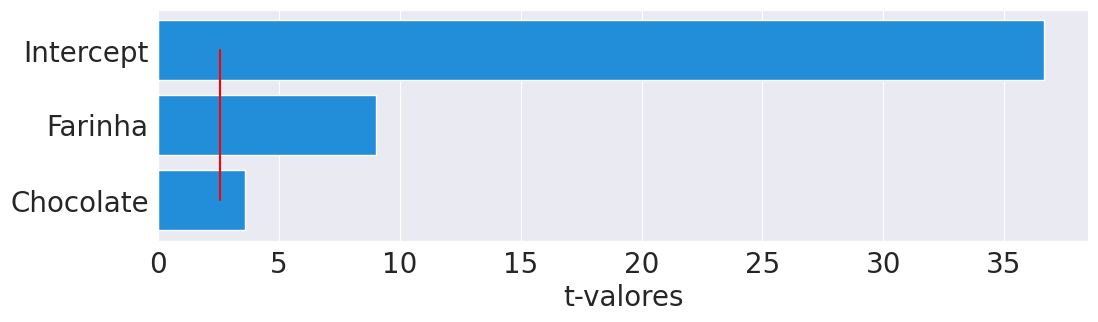

In [39]:
pareto = sns.barplot(x = t_valores, y= nome)

pareto.figure.set_size_inches(12,3)

pareto.tick_params(labelsize = 20)

pareto.set_xlabel('t-valores', fontsize=20)

pareto.plot(limite,nome,'r')


# Preditos por observados

In [40]:
observados = experimento['Porcoes']
observados

,Porcoes
0,19
1,37
2,24
3,49
4,29
5,30
6,29
7,30


In [41]:
preditos = modelo_ajustado_2.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [42]:
import  matplotlib.pyplot as plt

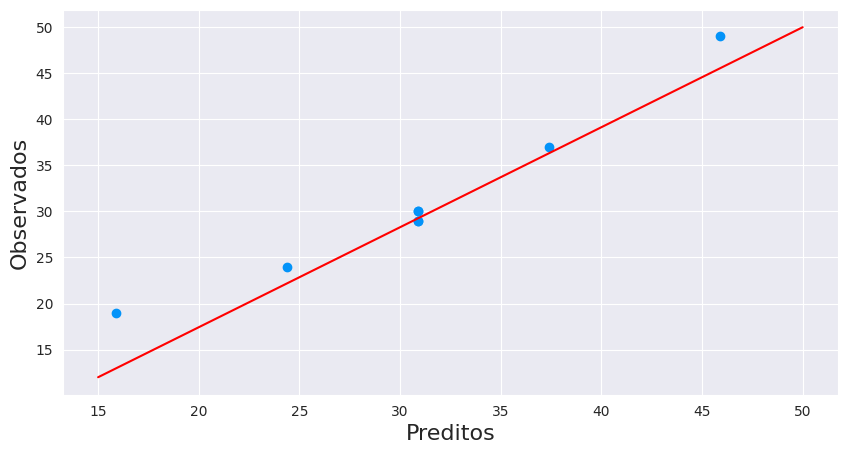

In [43]:
plt.figure(figsize = (10,5))
plt.xlabel('Preditos', fontsize = 16)
plt.ylabel('Observados', fontsize = 16)

#linha de guia
x = np.linspace(start = 15, stop = 50, num= 10)

y = np.linspace(start = 12, stop = 50, num = 10)

plt.plot(x,y,'r')

#comparação

plt.scatter(preditos,observados)



In [44]:
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 09 Aug 2024   Prob (F-statistic):           0.000571
Time:                        20:27:41   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  res = hypotest_fun_out(*samples, **kwds)


# Explorando o modelo

In [45]:
parametros = modelo_ajustado_2.params
parametros

,0
Intercept,30.875
Farinha,10.750
Chocolate,4.250


## Definindo a função

In [50]:
def modelo_receita(x_f,x_c):

  #limite

  limite_normalizado = [-1,+1]

  limite_farinha = [0.5, 1.5]

  limite_chocolate = [0.1,0.5]

  #Converter

  x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado)

  x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado)

  porcoes = parametros['Intercept'] + parametros['Farinha'] * x_f_convertido + parametros['Chocolate'] * x_c_convertido

  return round(porcoes)



In [60]:
# testando a função, passando os parâmentros de farinha e chocolate em KG.
modelo_receita(0.6,0.1)


18

# Mapa de Cores

## criando pontos limites para plotar no mapa de cores

In [55]:
# criando pontos para a farinha
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10)
x_farinha


array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [56]:
# criando pontos para o chocolate
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10)
x_chocolate


array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [62]:
pontos = []

for cont1 in x_farinha:

  temp = []

  for cont2 in x_chocolate:

    temp.append(modelo_receita(cont1,cont2))

  pontos.append(temp)

In [63]:
pontos


[[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

# Construindo a superfície de resposta

## importando a paleta de cores

In [64]:
import matplotlib.cm as cm

<a list of 7 text.Text objects>

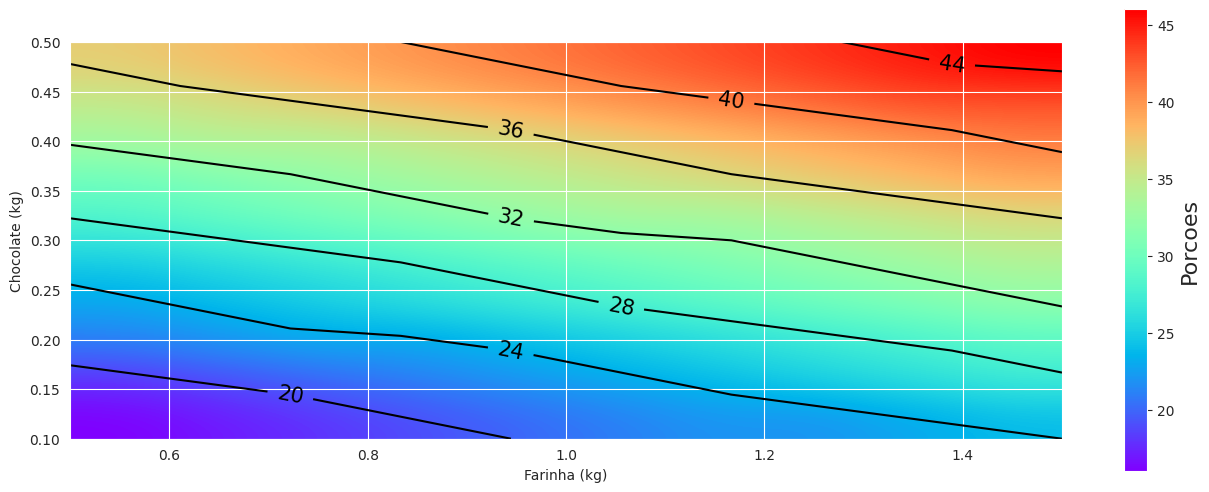

In [75]:
#base
plt.figure(figsize = (16,6))
plt.xlabel('Farinha (kg)', fontsize = 10)
plt.ylabel('Chocolate (kg)' ,fontsize = 10)

#mapa de cores
mapa_cor = plt.imshow(pontos, origin='lower', cmap = cm.rainbow, interpolation= 'quadric', extent= (0.5,1.5, 0.1,0.5))

#barra de cores
plt.colorbar().set_label('Porcoes', fontsize=16)

#linha
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors = 'k', linewidths = 1.5)

plt.clabel(linhas, inline = True, fmt='%1.0f' ,fontsize = 15.0, inline_spacing = 10)

